Premières lignes du fichier CSV :

region_administrative departement identifiant_museofile               commune                           nom_officiel_du_musee                                              adresse                        lieu  code_postal               telephone                                                        url  latitude  longitude ref_deps    geolocalisation date_arrete_attribution_appellation
 Auvergne-Rhône-Alpes         Ain                 M0965                Briord musée de la société d'histoire et d'archéologie                                                  NaN                    Au bourg       1470.0 04 74 36 72 06 (mairie)  patrimoines.ain.fr/n/musee-d-archeologie-de-briord/n:1165 45.781653   5.458569  0106401 45.781653,5.458569                          2003-02-01
 Auvergne-Rhône-Alpes         Ain                 M0972 Saint-Cyr-sur-Menthon               domaine des Saveurs – Les Planons                            987 chemin des Seiglières           

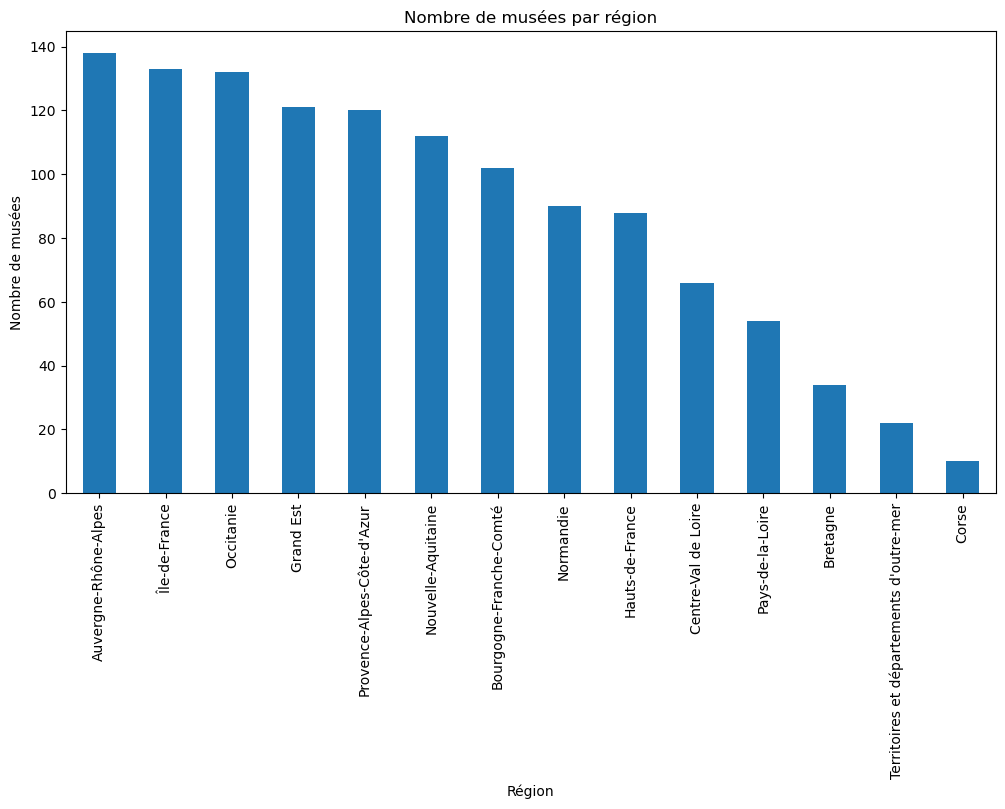

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Chemin d'accès au fichier CSV
csv_path = '/home/moaz/Documents/jupyter/france_museum_data/museums.csv'

# Chargement du fichier CSV
data = pd.read_csv(csv_path, delimiter=';')

# Affichage des premières lignes pour vérification
print("Premières lignes du fichier CSV :\n")
print(data.head().to_string(index=False))

# Séparateur
print("\n" + "=" * 50 + "\n")

# Vérification des colonnes disponibles
print("Colonnes disponibles :\n")
print(data.columns.to_list())

# Séparateur
print("\n" + "=" * 50 + "\n")

# Vérification des informations sur les données
print("Informations sur les données :\n")
print(data.info())

# Séparateurimport result 
print("\n" + "=" * 50 + "\n")

# Vérification des statistiques descriptives
print("Statistiques descriptives :\n")
print(data.describe().to_string())

# Séparateur
print("\n" + "=" * 50 + "\n")

# Affichage des graphiques
# Histogramme du nombre de musées par région
print("Histogramme du nombre de musées par région :\n")
data['region_administrative'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Région')
plt.ylabel('Nombre de musées')
plt.title('Nombre de musées par région')
plt.show()


In [13]:
import folium
from urllib.parse import urlparse
# Création d'une carte avec une hauteur plus grande (par exemple, 800 pixels)
museum_map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=7)
                        

# Ajout de marqueurs pour chaque musée
for index, row in data.iterrows():
    # Vérification de la présence d'un site internet
    if pd.notnull(row['url']):
        # Vérification du préfixe de l'URL et ajout si nécessaire
        parsed_url = urlparse(row['url'])
        if not parsed_url.scheme:
            url = f"http://{row['url']}"
        else:
            url = row['url']
        
        # Marqueur vert pour les musées avec un site internet
        icon_color = 'green'
        # Création d'un lien cliquable vers le site internet
        popup_html = f"<a href='{url}' target='_blank'>{row['nom_officiel_du_musee']}</a>"
    else:
        # Marqueur par défaut pour les musées sans site internet
        icon_color = 'blue'
        # Popup sans lien
        popup_html = row['nom_officiel_du_musee']
    
    # Ajout du marqueur avec la couleur et le popup appropriés
    folium.Marker([row['latitude'], row['longitude']],
                  popup=popup_html,
                  icon=folium.Icon(color=icon_color)).add_to(museum_map)

# Affichage de la carte
museum_map
